<b>Tasks:</b>
- Generation of data
- Apply statistic methods of feature selections
- Apply SelectKBest
- Apply feature_importances_
- Apply SequentialFeatureSelector

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [158]:
# Step 1. Generation of data
from sklearn.datasets import make_classification
x, y = make_classification(scale=1,  random_state=3)

x.shape, y.shape

((100, 20), (100,))

In [159]:
x, y

(array([[ 0.29684453,  1.49152235, -0.03030337, ..., -0.53244395,
         -0.00629878,  1.42034231],
        [-2.60017737, -0.48449835,  0.12491415, ...,  1.6394023 ,
          0.50411937, -2.06325085],
        [-0.25281599, -1.59375081,  0.17238568, ..., -1.1761977 ,
         -0.7128498 , -1.15979227],
        ...,
        [ 0.75523666, -1.25619225, -0.38885375, ...,  0.31888107,
          0.37872822,  0.38012611],
        [ 2.05034549, -0.35920064, -0.3441663 , ..., -0.50767362,
         -0.34281254,  0.90079661],
        [ 0.90236805,  0.02250233, -0.67074472, ...,  1.69398556,
         -2.18947387, -0.57591035]]),
 array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1]))

Получили сгенерированный датасет состоящий из 100 экземпляров c 20 признаками.

In [160]:
# Step 2. Logistic Regression and cross_val_score of mean
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()

0.8100000000000002

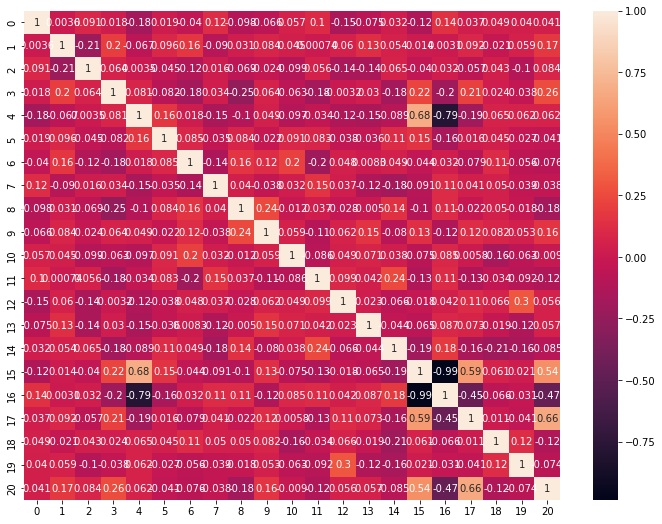

In [161]:
# Step 3. Statistic methods of feature selections
df = pd.DataFrame(np.concatenate((x, y.reshape(len(y), 1)), axis=1))

corr = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)
plt.show()

Высокая корреляция у признаков 4, 15, 16 между собой. Из них с целевой переменной наивысшая корреляция у признака 15.

Признак 17 имеет высокую корреляцию с признаками 15 и 16. Причем у него выше корреляция с целевой переменной.

<b>Удалим признаки 15 и 16.</b>

Также <b>удалим признаки с корреляией меньше 5%:  0, 5, 7, 10. </b>

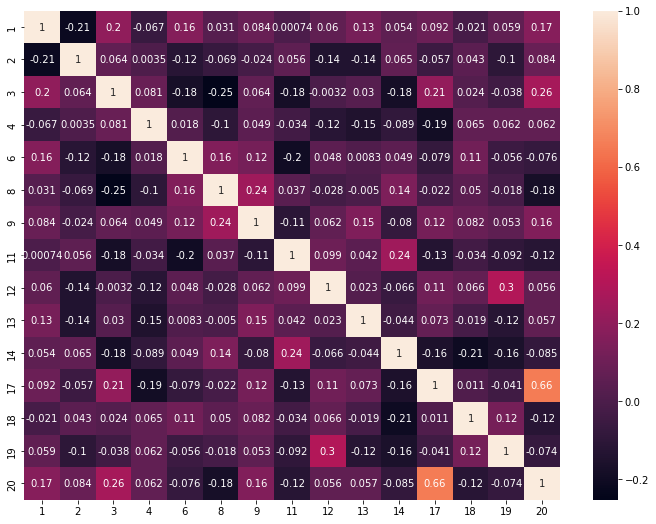

In [162]:
# Deleting features with high corr and construct a new corr heatmap
df_stat = df.drop(columns=[15, 16, 0, 5, 7, 10])

corr = df_stat.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)
plt.show()

In [163]:
# Первоначальный размер векторов
df_stat.drop(columns=[20]).shape

(100, 14)

In [167]:
cross_val_score(LogisticRegression(), df_stat.drop(columns=[20]), df_stat[20], scoring='accuracy').mean()

0.8400000000000001

<b>С помощью удаления высоко- и низко- скоррелированных признаков удалось увеличить качество до 84%.</b>

In [165]:
# VarianceThreshold Селектор признаков, который удаляет все фичи низкой дисперсии.
from sklearn.feature_selection import VarianceThreshold

X = np.array(df_stat.drop(columns=[20]))
selector = VarianceThreshold(threshold=1) # threshold  признаки с отклонением от тренировочного набора ниже этого порога будут удалены. По умолчанию все функции сохраняются с ненулевой дисперсией, т.е. удаляются функции, имеющие одинаковое значение во всех выборках.
X = selector.fit_transform(X, df_stat[20])

X.shape

(100, 9)

In [166]:
cross_val_score(LogisticRegression(), X, df_stat[20], scoring='accuracy').mean()

0.86

<b>Удалось увеличить качество модели на 5% с помощью статистичеких методов feature selections.</b>

In [98]:
# Step 4. Feature selections с помщью выбора 5 лучших признаков с помощью скоринговой функции для классификации f_classif

#SelectKBest - выбор фич в соответствии с К наивысших метрик.
from sklearn.feature_selection import SelectKBest, f_classif

X = np.array(df.drop(columns=[20]))
X = SelectKBest(f_classif, k=5).fit_transform(X, df[20])

X.shape

(100, 5)

In [99]:
cross_val_score(LogisticRegression(), X, df[20], scoring='accuracy').mean()

0.8299999999999998

<b>SelectKBest увеличил первоначальный результат на 2 процента.</b>

In [123]:
# Step 5. Feature selection using ML models
from sklearn.feature_selection import SelectFromModel # выбор признаков на основе весов важности.
from sklearn.linear_model import LogisticRegression

X = np.array(df.drop(columns=[20]))

selector = SelectFromModel(estimator=LogisticRegression(solver='liblinear', penalty='l1')).fit(X, df[20])
print(selector.get_support())
X = selector.transform(X)

cross_val_score(LogisticRegression(), X, df[20], scoring='accuracy').mean()

(100, 20)
[ True  True  True  True  True  True  True  True  True  True False False
 False False  True False False  True  True  True]
(100, 14)


0.86

<b>SelectFromModel увеличила качество до 86%.</b>

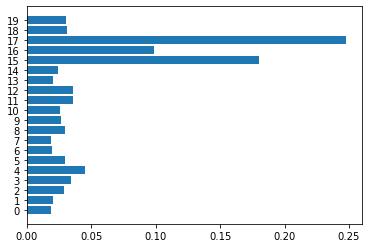

In [130]:
#DecisionTree  Classifier + Regressor
from sklearn.ensemble import RandomForestClassifier

X = np.array(df.drop(columns=[20]))

rfc = RandomForestClassifier()
rfc.fit(X, df[20])

#Оценка важности фичей
plt.barh(np.arange(len(rfc.feature_importances_)), rfc.feature_importances_)
plt.yticks(np.arange(len(df.drop(columns=[20]).columns)), df.drop(columns=[20]).columns)
plt.show()

Оставим только признаки 15, 16 и 17, как наиболее важные

In [131]:
cross_val_score(LogisticRegression(), df[[15, 16, 17]], df[20], scoring='accuracy').mean()

0.82

<b>Качество при использовании feature_importances_ 82%</b>

In [151]:
# Step 6. 
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

X = np.array(df.drop(columns=[20]))

knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=7)
sfs.fit(X, df[20])

X = sfs.transform(X)

cross_val_score(LogisticRegression(), X, df[20], scoring='accuracy').mean()

0.8400000000000001

<b>Качество при использовании SequentialFeatureSelector 84%.</b>

|                           | accuracy |
|---------------------------|----------|
| Original                  |   81%    |
| Deleting high and low corr|   84%    |
| VarianceThreshold         |   86%    |
| SelectKBest               |   83%    |
| SelectFromModel           |   86%    |
| RandomForestClassifier    |   82%    |
| SequentialFeatureSelector |   84%    |